In [2]:
#Capital Asset Pricing Model is a general model for pricing an individual security or portfolio. 
#As a model for predicting expected returns.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
TS=pd.read_csv('TSLA.csv',index_col='Date',parse_dates=True)#Tesla
KIA=pd.read_csv('000270.KS.csv',index_col='Date',parse_dates=True)#KIA
BMW=pd.read_csv('BMW.DE.csv',index_col='Date',parse_dates=True)#BMW
MCB=pd.read_csv('MBG.DE.csv',index_col='Date',parse_dates=True)#Mercedes
HY=pd.read_csv('HYMTF.csv',index_col='Date',parse_dates=True)#Hyundai

In [3]:
def compute_cumulative(df,get_absolute=True): #Absolute>$Amount
    initial_price=df['Adj Close'].iloc[0]
    final_price=df['Adj Close'].iloc[-1]
    if get_absolute:
        return final_price-initial_price
    else:
        return 100*(final_price-initial_price)/initial_price
    

In [4]:
TS_absolute_cumulative_return = compute_cumulative(TS)
TS_percentage_cumulative_return = compute_cumulative(TS, False) 

KIA_absolute_cumulative_return = compute_cumulative(KIA)
KIA_percentage_cumulative_return = compute_cumulative(KIA, False) 

BMW_absolute_cumulative_return = compute_cumulative(BMW)
BMW_percentage_cumulative_return = compute_cumulative(BMW, False)

MCB_absolute_cumulative_return = compute_cumulative(MCB)
MCB_percentage_cumulative_return = compute_cumulative(MCB, False) 

HY_absolute_cumulative_return = compute_cumulative(HY)
HY_percentage_cumulative_return = compute_cumulative(HY, False) 

print(f"Tesla cumulative return: {TS_absolute_cumulative_return}; Percentage: {TS_percentage_cumulative_return}%")
print(f"KIA cumulative return: {KIA_absolute_cumulative_return}; Percentage: {KIA_percentage_cumulative_return}%")
print(f"BMW cumulative return: {BMW_absolute_cumulative_return}; Percentage: {BMW_percentage_cumulative_return}%")
print(f"MCB cumulative return: {MCB_absolute_cumulative_return}; Percentage: {MCB_percentage_cumulative_return}%")
print(f"Hyundai cumulative return: {HY_absolute_cumulative_return}; Percentage: {HY_percentage_cumulative_return}%")

Tesla cumulative return: -241.49666499999998; Percentage: -66.22758051974735%
KIA cumulative return: -19089.351563000004; Percentage: -23.339653876942673%
BMW cumulative return: -0.1542660000000069; Percentage: -0.18440900551324768%
MCB cumulative return: -3.332099999999997; Percentage: -5.151502661524673%
Hyundai cumulative return: -12.0; Percentage: -28.571428571428573%


In [5]:
def create_cumulative_abs(df):
    df['Cumulative Absolute']=df['Adj Close']-df['Adj Close'].iloc[0]
    return df

In [6]:
TS=create_cumulative_abs(TS) #Absolute dollar gains
KIA=create_cumulative_abs(KIA)
BMW=create_cumulative_abs(BMW)
MCB=create_cumulative_abs(MCB)
HY=create_cumulative_abs(HY)

In [7]:
TS.head()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Absolute
Date,,,,,,,
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900,0.000000
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000,-1.823333
2021-12-29,366.213318,368.000000,354.713318,362.063324,362.063324,56154000,-2.583343
2021-12-30,353.776672,365.183319,351.049988,356.779999,356.779999,47040900,-7.866668
2021-12-31,357.813324,360.666656,351.529999,352.260010,352.260010,40733700,-12.386657


Text(0, 0.5, 'Absolute Dollar Gain per Share')

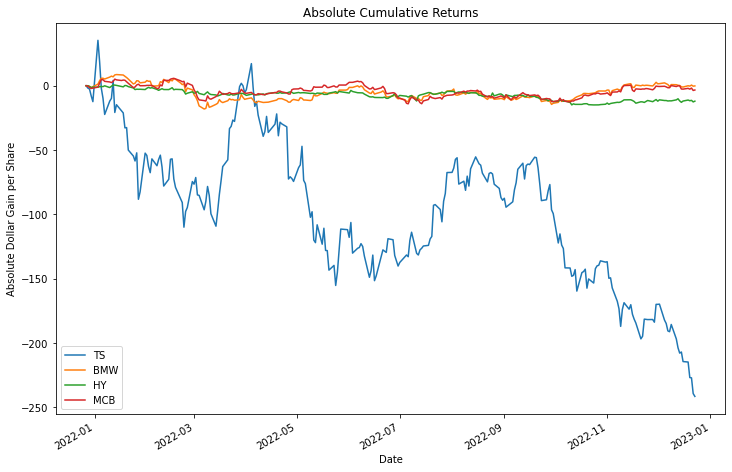

In [8]:
TS['Cumulative Absolute'].plot(label='TS',figsize=(12,8))
BMW['Cumulative Absolute'].plot(label='BMW')
HY['Cumulative Absolute'].plot(label='HY')
MCB['Cumulative Absolute'].plot(label='MCB')
plt.legend()
plt.title("Absolute Cumulative Returns")
plt.ylabel("Absolute Dollar Gain per Share")

<AxesSubplot:xlabel='Date'>

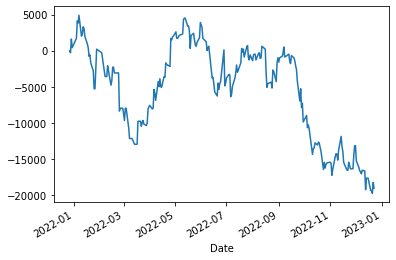

In [9]:
KIA['Cumulative Absolute'].plot(label='KIA')

In [10]:
def create_cumulative_prc(df):
    df['Cumulative Percentage']=100*(df['Adj Close']-df['Adj Close'].iloc[0])/df['Adj Close'].iloc[0]
    return df

In [11]:
TS=create_cumulative_prc(TS)
BMW=create_cumulative_prc(BMW)
HY=create_cumulative_prc(HY)
MCB=create_cumulative_prc(MCB)
KIA=create_cumulative_prc(KIA)

Text(0.5, 1.0, 'Percent Cumulative Returns')

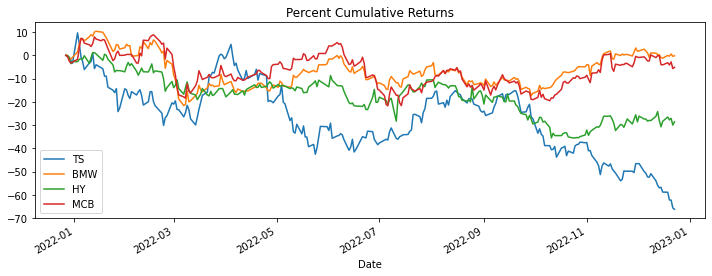

In [12]:
TS['Cumulative Percentage'].plot(label='TS',figsize=(12,4))
BMW['Cumulative Percentage'].plot(label='BMW')
HY['Cumulative Percentage'].plot(label='HY')
MCB['Cumulative Percentage'].plot(label='MCB')
plt.legend()
plt.title('Percent Cumulative Returns')

In [13]:
TS['Daily Return']=TS['Adj Close'].pct_change(1)
BMW['Daily Return']=BMW['Adj Close'].pct_change(1).dropna()
HY['Daily Return']=HY['Adj Close'].pct_change(1).dropna()
MCB['Daily Return']=MCB['Adj Close'].pct_change(1).dropna()

Text(0.5, 1.0, 'Daily Returns: BMW')

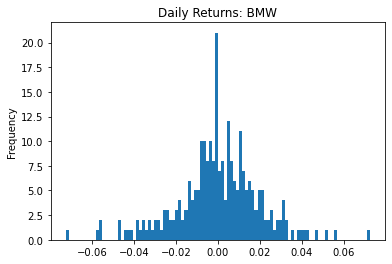

In [15]:
BMW['Daily Return'].plot(kind='hist',bins=100)
plt.title("Daily Returns: BMW")

Text(0.5, 1.0, 'Daily Returns: HY')

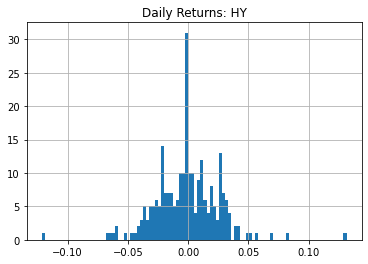

In [16]:
HY["Daily Return"].hist(bins=100)
plt.title("Daily Returns: HY")

Text(0.5, 1.0, 'Daily Returns: MCB')

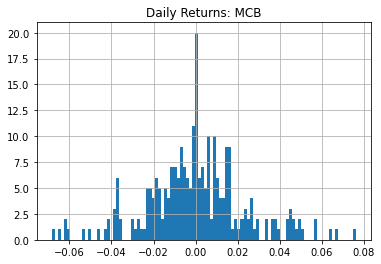

In [17]:
MCB["Daily Return"].hist(bins=100)
plt.title("Daily Returns: MCB")

In [ ]:
#Daily Return Performance Comparison
#Compare daily returns with benchmark.
#We can use a scatter plot to compare the daily return of our stocks with the Hyundai(HY).

Text(0, 0.5, 'Daily Change: HY')

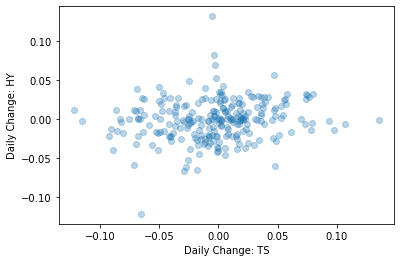

In [33]:
plt.scatter(TS['Daily Return']['2022-01-01':'2022-12-23'],HY['Daily Return']['2022-01-01':'2022-12-23'],alpha=0.3)
plt.xlabel("Daily Change: TS")
plt.ylabel("Daily Change: HY")

In [ ]:
#Cummulative Returns from Daily Returns
#Using a bit of clever math, we can see that cummulative returns can be derived from daily returns:

In [19]:
TS

,Open,High,Low,Close,Adj Close,Volume,Cumulative Absolute,Cumulative Percentage,Daily Return
Date,,,,,,,,,
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900,0.000000,0.000000,NaN
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000,-1.823333,-0.500027,-0.005000
2021-12-29,366.213318,368.000000,354.713318,362.063324,362.063324,56154000,-2.583343,-0.708451,-0.002095
2021-12-30,353.776672,365.183319,351.049988,356.779999,356.779999,47040900,-7.866668,-2.157340,-0.014592
2021-12-31,357.813324,360.666656,351.529999,352.260010,352.260010,40733700,-12.386657,-3.396893,-0.012669
...,...,...,...,...,...,...,...,...,...
2022-12-19,154.000000,155.250000,145.820007,149.869995,149.869995,139390600,-214.776672,-58.899941,-0.002396
2022-12-20,146.050003,148.470001,137.660004,137.800003,137.800003,159563300,-226.846664,-62.209992,-0.080536
2022-12-21,139.339996,141.259995,135.889999,137.570007,137.570007,145417400,-227.076660,-62.273066,-0.001669


In [20]:
(1 + TS['Adj Close'].pct_change(1)).cumprod() - 1

Date
2021-12-27         NaN
2021-12-28   -0.005000
2021-12-29   -0.007085
2021-12-30   -0.021573
2021-12-31   -0.033969
                ...   
2022-12-19   -0.588999
2022-12-20   -0.622100
2022-12-21   -0.622731
2022-12-22   -0.656243
2022-12-23   -0.662276
Name: Adj Close, Length: 252, dtype: float64

In [21]:
ser=(1 + TS['Adj Close'].pct_change(1)).cumprod() - 1
100*ser

Date
2021-12-27          NaN
2021-12-28    -0.500027
2021-12-29    -0.708451
2021-12-30    -2.157340
2021-12-31    -3.396893
                ...    
2022-12-19   -58.899941
2022-12-20   -62.209992
2022-12-21   -62.273066
2022-12-22   -65.624258
2022-12-23   -66.227581
Name: Adj Close, Length: 252, dtype: float64